# **Modelo de preditivo de preços das ações da WEG SA**

## Obtive os dados de preços, volatilidade ao longo do tempo para a partir daí criar um modelo estatístico simples (uma regressão múltipla) que prevê os preços das ações da WEG ao longo do período considerado.

## É um modelo muito básico de predição, mas interessante.

### Carrego as bibliotecas que utilizarei:

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import datetime as dt
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Baixar os dados de preços das ações da WEG:

In [33]:
def dados_preçosweg():

    # Definir o intervalo de datas: de 01/01/2014 até 08/07/2024.
    start = dt.datetime(2014, 1, 1)
    end = dt.datetime(2024, 7, 8 )

    # Lista de tickers das empresas
    tickers = ['WEGE3.SA']

    # Criar um DataFrame vazio para armazenar os dados
    df = pd.DataFrame()

    # Baixar os dados de fechamento da empresa e armazenar no DataFrame df
    for ticker in tickers:
        try:
            data = yf.download(ticker, start=start, end=end)['Close']
            # Renomear a coluna do DataFrame para incluir o ticker
            df[ticker.split('.')[0]] = data
        except Exception as e:
            print(f"Erro ao baixar dados para {ticker}: {e}")

    return df

### Colocar os dados de preços em um dataframe e plotá-los em um gráfico de linhas com duas linhas de tendência (um reta, outra curva):

In [34]:
# Obter os dados
df = dados_preçosweg()

[*********************100%%**********************]  1 of 1 completed


In [35]:
print(df)

                WEGE3
Date                 
2014-01-02   4.497041
2014-01-03   4.455621
2014-01-06   4.479289
2014-01-07   4.476331
2014-01-08   4.399408
...               ...
2024-07-01  41.970001
2024-07-02  42.029999
2024-07-03  42.110001
2024-07-04  41.889999
2024-07-05  42.189999

[2613 rows x 1 columns]


In [36]:
# Criar uma coluna Date_numeric que será a data em numérico, dãã
df['Date_numeric'] = df.index.astype('int64') // 10**9
print(df)

                WEGE3  Date_numeric
Date                               
2014-01-02   4.497041    1388620800
2014-01-03   4.455621    1388707200
2014-01-06   4.479289    1388966400
2014-01-07   4.476331    1389052800
2014-01-08   4.399408    1389139200
...               ...           ...
2024-07-01  41.970001    1719792000
2024-07-02  42.029999    1719878400
2024-07-03  42.110001    1719964800
2024-07-04  41.889999    1720051200
2024-07-05  42.189999    1720137600

[2613 rows x 2 columns]


## Visualizar isso em um gráfico

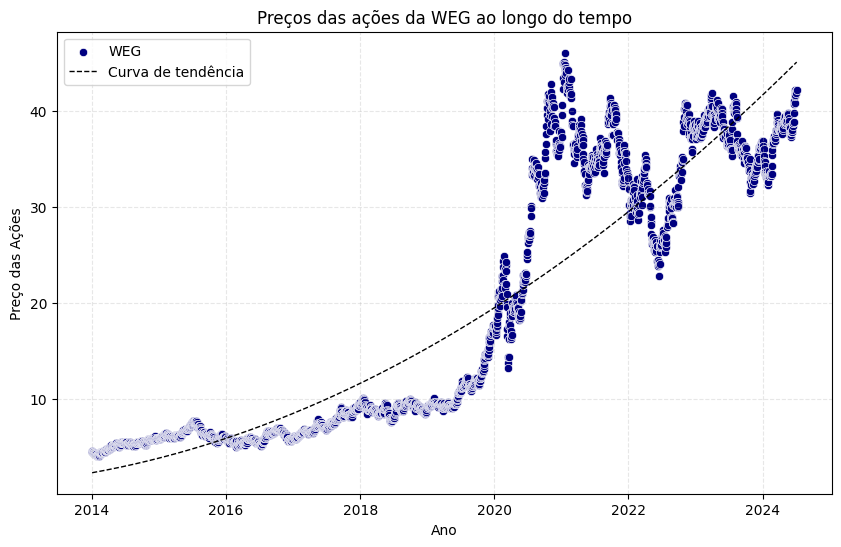

In [28]:
# Criar uma figura
plt.figure(figsize=(10, 6))

# Plotar os dados sobre os preços das ações da WEG
sns.scatterplot(data=df, x='Date', y='WEGE3', label='WEG', color='navy')

# Adicionar linha de tendência

#ajusto os dados para uma curva polinomial de grau 2 (obtendo os coeficientes)
coeficientes = np.polyfit(df['Date_numeric'], df['WEGE3'], 2)

#crio um objeto de função polinomial a partir dos coeficientes obtidos
tendencia = np.poly1d(coeficientes)

# Ploto os dados em uma curva de tendência
plt.plot(df.index, tendencia(df['Date_numeric']), label='Curva de tendência', color='black', linestyle='--', linewidth=1)

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')

# Título do gráfico
plt.title('Preços das ações da WEG ao longo do tempo')

# Mostrar a legenda no gráfico
plt.legend()

# Mostrar as grades no gráfico
plt.grid(True, alpha = 0.3, linestyle = '--')

# Mostrar o gráfico
plt.show()

## Distribuição dos preços em todo o período (2014 a 2024):

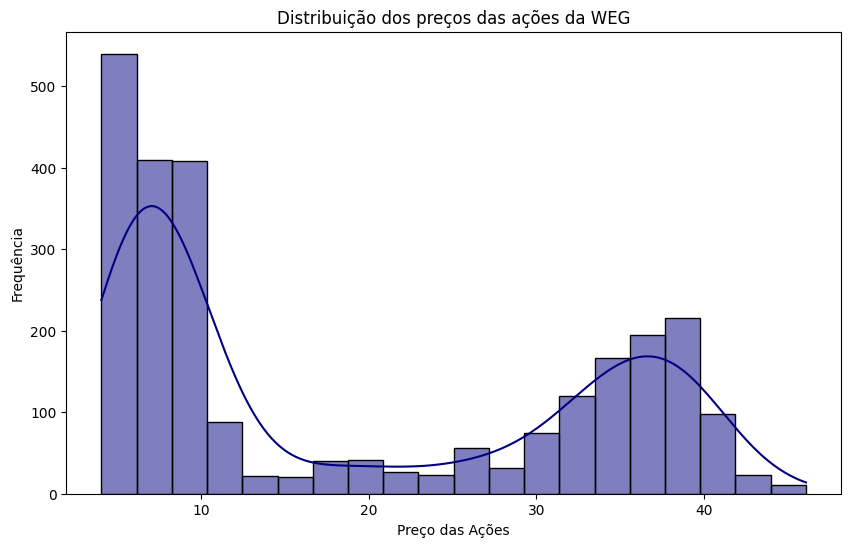

In [ ]:
#vou criar uma distribuição com seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['WEGE3'], bins=20, kde=True, color='navy')

# Nomear os eixos do gráfico
plt.xlabel('Preço das Ações')
plt.ylabel('Frequência')

# Título do gráfico
plt.title('Distribuição dos preços das ações da WEG')

# Mostrar o gráfico
plt.show()

## Distribuição dos preços até 2019

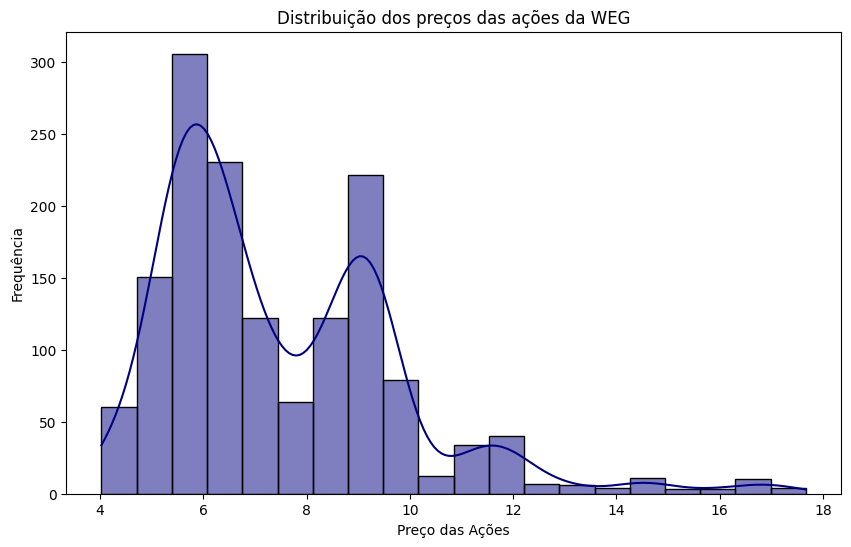

In [ ]:
# vou colocar um gráfico de distribuição até 2019
plt.figure(figsize=(10, 6))
sns.histplot(df['WEGE3'][df.index.year <= 2019], bins=20, kde=True, color='navy')

# Nomear os eixos do gráfico
plt.xlabel('Preço das Ações')
plt.ylabel('Frequência')

# Título do gráfico
plt.title('Distribuição dos preços das ações da WEG')

# Mostrar o gráfico
plt.show()

## Distribuição dos preços após 2019 até agora

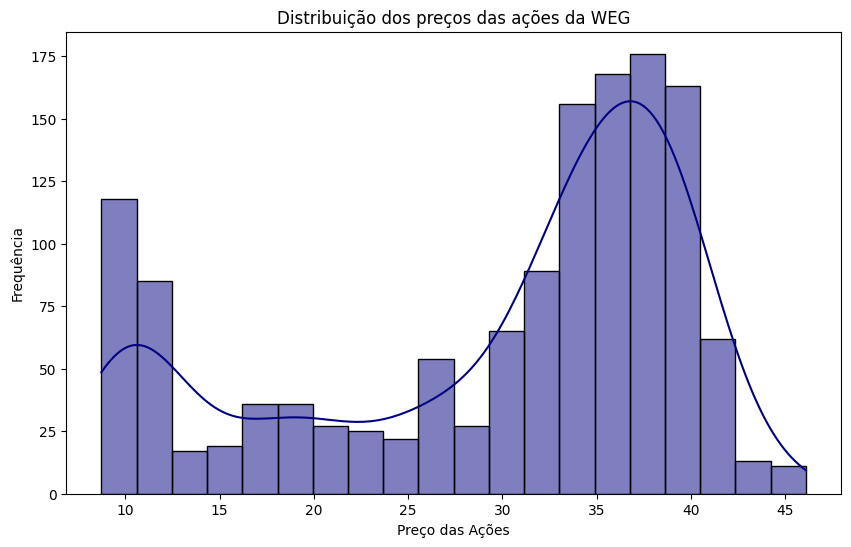

In [ ]:
#vou colocar um gráfico de distribuição a partir do ano de 2019
plt.figure(figsize=(10, 6))
sns.histplot(df['WEGE3'][df.index.year >= 2019], bins=20, kde=True, color='navy')

# Nomear os eixos do gráfico
plt.xlabel('Preço das Ações')
plt.ylabel('Frequência')

# Título do gráfico
plt.title('Distribuição dos preços das ações da WEG')

# Mostrar o gráfico
plt.show()

## O patamar de preços mais comuns vem subindo

## Ver como o dataframe está agora

In [37]:
#vou colocar o index como coluna Date
df.reset_index(inplace=True)

#vou colocar como datetime
df['Date'] = pd.to_datetime(df['Date'])
print(df)

           Date      WEGE3  Date_numeric
0    2014-01-02   4.497041    1388620800
1    2014-01-03   4.455621    1388707200
2    2014-01-06   4.479289    1388966400
3    2014-01-07   4.476331    1389052800
4    2014-01-08   4.399408    1389139200
...         ...        ...           ...
2608 2024-07-01  41.970001    1719792000
2609 2024-07-02  42.029999    1719878400
2610 2024-07-03  42.110001    1719964800
2611 2024-07-04  41.889999    1720051200
2612 2024-07-05  42.189999    1720137600

[2613 rows x 3 columns]


## Calcular a média móvel de 50 em 50 cotações

In [38]:
# Calcular a média móvel de 50 dias para a coluna 'WEGE3'
df['SMA_50'] = df['WEGE3'].rolling(window=50).mean()

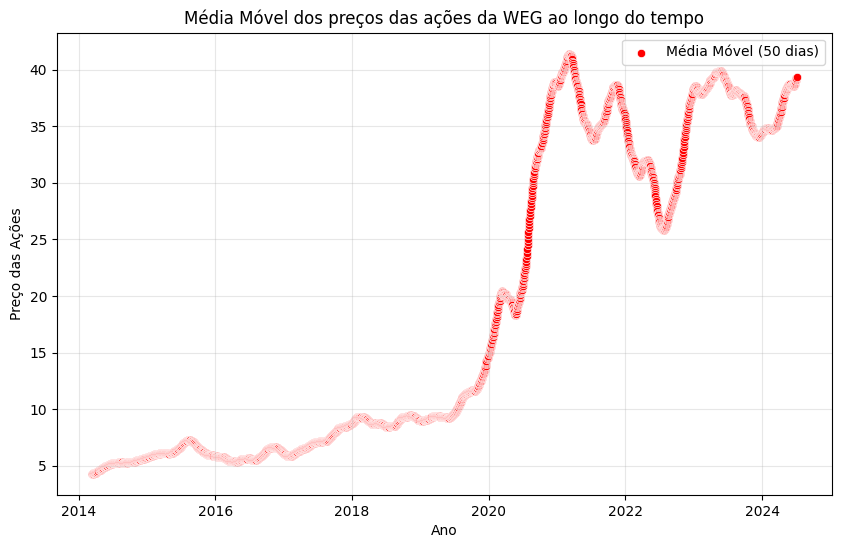

In [ ]:
#vou colocar a média móvel em um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Date', y='SMA_50', label='Média Móvel (50 dias)', color='red')
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')
plt.title('Média Móvel dos preços das ações da WEG ao longo do tempo')
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()

## Vou calcular a volatilidade:

In [39]:
df['Volatility'] = df['WEGE3'].rolling(window=50).std()

In [ ]:
#ver como o df ficou
print(df)

           Date      WEGE3  Date_numeric   SMA_50  Volatility
0    2014-01-02   4.497041    1388620800      NaN         NaN
1    2014-01-03   4.455621    1388707200      NaN         NaN
2    2014-01-06   4.479289    1388966400      NaN         NaN
3    2014-01-07   4.476331    1389052800      NaN         NaN
4    2014-01-08   4.399408    1389139200      NaN         NaN
...         ...        ...           ...      ...         ...
2607 2024-06-28  42.189999    1719532800  39.0602    1.185853
2608 2024-07-01  41.970001    1719792000  39.1276    1.253030
2609 2024-07-02  42.029999    1719878400  39.1972    1.315389
2610 2024-07-03  42.110001    1719964800  39.2740    1.371071
2611 2024-07-04  41.889999    1720051200  39.3520    1.406999

[2612 rows x 5 columns]


## Veja a volatilidade

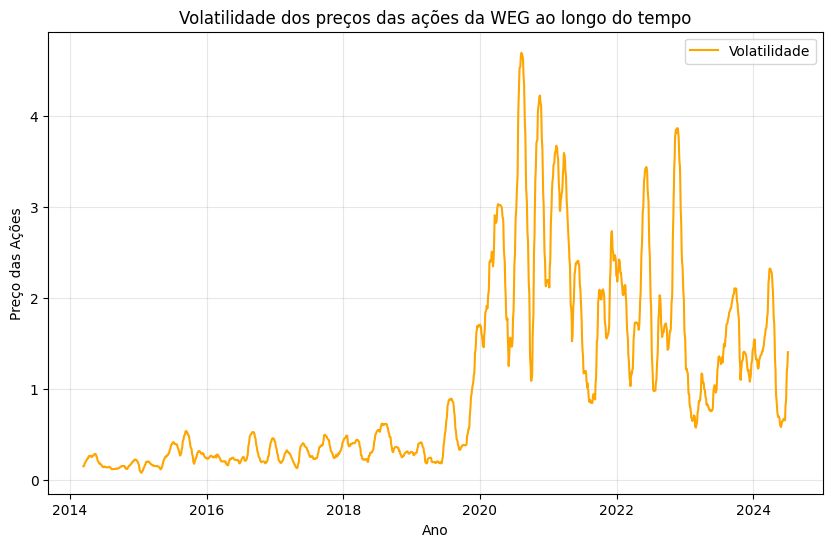

In [ ]:
#vou colocar a volatilidade em um gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Volatility', label='Volatilidade', color='orange')

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')
plt.title('Volatilidade dos preços das ações da WEG ao longo do tempo')
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()

## Veja como a volatilidade era baixíssima até a pandemia. Agora ela parece estar se estabilizando novamente.

## Vou criar o modelo preditivo

In [40]:
df = df.dropna()  # Remover quaisquer valores nulos

In [41]:
# Divisão dos dados:

# Vou usar 80% dos dados para treinamento e 20% para teste.
train_size = int(len(df) * 0.8)

# Separa os dados em treinamento e teste
train_data = df[:train_size]
test_data = df[train_size:]

In [42]:
# Treinamento do modelo:

#Vou lidar com as variáveis que serão "treinadas":

# Separo as colunas (SMA_50 e Volatility) como variáveis independentes (X's) e armazeno em _train
# e a coluna WEGE3 como variável dependente (y) nos dados de teste, armazeno isso em y_train
X_train = train_data[['SMA_50', 'Volatility']]
y_train = train_data['WEGE3']

# Vou estimar por Modelo de regressão linear
modelo = LinearRegression()

#Com o comando model.fit eu treino o modelo com base em uma regressão
modelo.fit(X_train, y_train)

# Previsões:

#Aqui eu lido com as variáveis que eu usarei como "teste"
# Novamente, Separo as colunas (SMA_50 e Volatility) como variáveis independentes (X)
# e a coluna WEGE3 como variável dependente (y) nos dados de teste.
X_test = test_data[['SMA_50', 'Volatility']]
y_test = test_data['WEGE3']

# Uso o modelo treinado para fazer previsões nos dados de teste (X_test),
# armazenando as previsões em 'predictions'
predictions = modelo.predict(X_test)

# Avaliação do modelo:

#Calcula o erro quadrático médio (RMSE) e o erro absoluto médio (MAE) para avaliar a precisão do modelo
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

#Escreve os dois na tela
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 2.379749963130035
MAE: 1.9766286049783033


## Veja como o dataframe está agora:

In [43]:
test_data = test_data.copy()
print(test_data)

           Date      WEGE3  Date_numeric   SMA_50  Volatility
2100 2022-06-17  22.830000    1655424000  27.9178    3.150758
2101 2022-06-20  24.100000    1655683200  27.7132    3.056618
2102 2022-06-21  25.299999    1655769600  27.5368    2.931264
2103 2022-06-22  25.790001    1655856000  27.3698    2.781417
2104 2022-06-23  25.910000    1655942400  27.2370    2.685914
...         ...        ...           ...      ...         ...
2608 2024-07-01  41.970001    1719792000  39.1276    1.253030
2609 2024-07-02  42.029999    1719878400  39.1972    1.315389
2610 2024-07-03  42.110001    1719964800  39.2740    1.371071
2611 2024-07-04  41.889999    1720051200  39.3520    1.406999
2612 2024-07-05  42.189999    1720137600  39.4312    1.453246

[513 rows x 5 columns]


## Vou plotar no gráfico os dados com a variação real e a variação que o modelo previu para o período

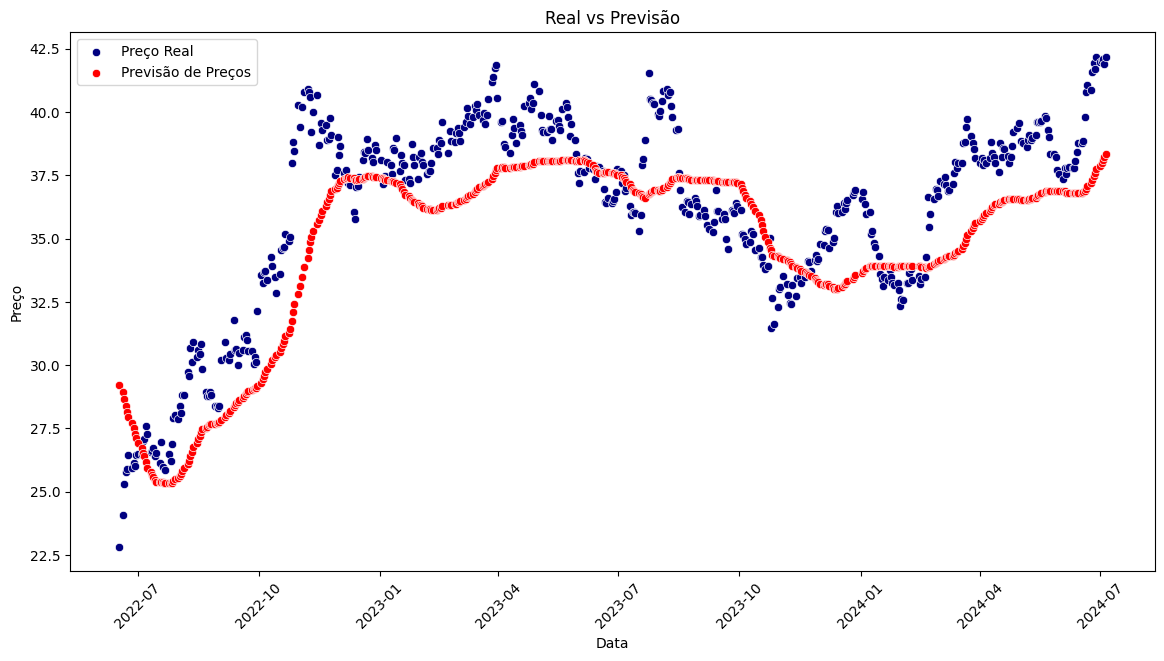

In [44]:
# Visualização dos resultados com Seaborn
plt.figure(figsize=(14, 7))

#Gráfico dos dados reais
sns.scatterplot(x=test_data['Date'], y=y_test, label='Preço Real', color='navy')

#Gráfico das previsões
sns.scatterplot(x=test_data['Date'], y=predictions, label='Previsão de Preços', color='red')

# Nomear os eixos do gráfico
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Real vs Previsão')

#Rotaciona os rótulos do eixo x
plt.xticks(rotation=45)

# Mostrar a legenda no gráfico
plt.legend()
plt.show()



---



---



## Vou criar uma modelagem estatística de Regressão Logística para calcular a probabilidade do preço da ação cair com base nesses dois fatores

In [45]:
# Criar a variável binária Price_Drop
df['Price_Drop'] = np.where(df['WEGE3'].shift(-1) < df['WEGE3'], 1, 0)

In [46]:
# Variáveis independentes
X = df[['SMA_50', 'Volatility']]
# Adicionar constante para o modelo
X = sm.add_constant(X)

# Variável dependente
y = df['Price_Drop']

# Ajustar o modelo de regressão logística
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Resumo do modelo
print(result.summary())

# Prever a probabilidade de queda no preço da ação
df['Predicted_Prob'] = result.predict(X)

# Visualizar as previsões
print(df[['WEGE3', 'Price_Drop', 'Predicted_Prob']].head())

Optimization terminated successfully.
         Current function value: 0.690570
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             Price_Drop   No. Observations:                 2564
Model:                          Logit   Df Residuals:                     2561
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Jul 2024   Pseudo R-squ.:                0.002295
Time:                        12:35:05   Log-Likelihood:                -1770.6
converged:                       True   LL-Null:                       -1774.7
Covariance Type:            nonrobust   LLR p-value:                   0.01704
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2442      0.067     -3.618      0.000      -0.376      -0.112
SMA_50         0.0088      0.

## Analisando o resultado acima:

## O Pseudo R-squ. foi de 0.002295 -- o que é muito pequeno. Essa é uma medida de quão bem as variáveis independentes (volatilidade e média móvel) explicam a variabilidade da variável dependente (preço da ação). Dessa forma, conclui-se que a volatilidade e a média dos preços anteriores não explicam bem se os preços futuros subirão ou caírão.

## Veja a análise dos coeficientes obtidos:
## - const: A constante (intercepto) é significativa (p < 0.05), indicando que, quando SMA_50 e Volatility são zero, a log-odds de uma queda no preço é -0.2442.

##- SMA_50: o coeficiente de SMA_50 (média móvel) é significativo (p < 0.05), indicando que um aumento em SMA_50 está associado a um pequeno aumento na probabilidade de queda no preço da ação.

## - Volatility: O coeficiente de Volatility não é significativo (p > 0.05), indicando que a volatilidade não tem um efeito estatisticamente significativo na probabilidade de queda no preço da ação.

## **É apenas um jeito bonito de dizer que não tem como prever o futuro!**



---



---



## Mesmo assim, lá vamos nós: agora sim vou para as previsões com base em um modelo baseado nos dados anteriores.

## Vou pegar esses dados e deduzir, estatisticamente, onde os preços das ações da empresa deveriam estar dado que vou modelar que esses preços dependem, na média, da média móvel dos preços anteriores e da volatilidade móvel

## Dessa forma, quero utilizar esse modelo criado para prever os preços futuros das ações da WEG até o final do ano

In [48]:
# Novo treinamento do modelo com todos os dados

#especifico as variáveis independentes e as dependentes
X = df[['SMA_50', 'Volatility']]
y = df['WEGE3']

#crio o modelo de regressão
model = LinearRegression()
model.fit(X, y)

# Gero datas futuras até janeiro de 2025
dates_future = pd.date_range(start=df['Date'].max(), periods=8, freq='M')  # Gerando datas mensais até janeiro de 2025

# DataFrame para armazenar as datas futuras
future_data = pd.DataFrame({'Date': dates_future})

# Calcular SMA_50 e Volatility para datas futuras
# Como não temos dados reais futuros, vamos assumir que SMA_50 e Volatility para as datas futuras serão iguais ao último valor conhecido
# Este é um método simples e pode ser melhorado com uma abordagem mais robusta, mas por hora vamos usar isso

last_sma_50 = df['SMA_50'].iloc[-1]
last_volatility = df['Volatility'].iloc[-1]

future_data['SMA_50'] = last_sma_50
future_data['Volatility'] = last_volatility

# Realizar as previsões para as datas futuras
X_future = future_data[['SMA_50', 'Volatility']]
predictions_future = model.predict(X_future)

# Adicionar as previsões ao DataFrame das datas futuras
future_data['Predicted_WEGE3'] = predictions_future

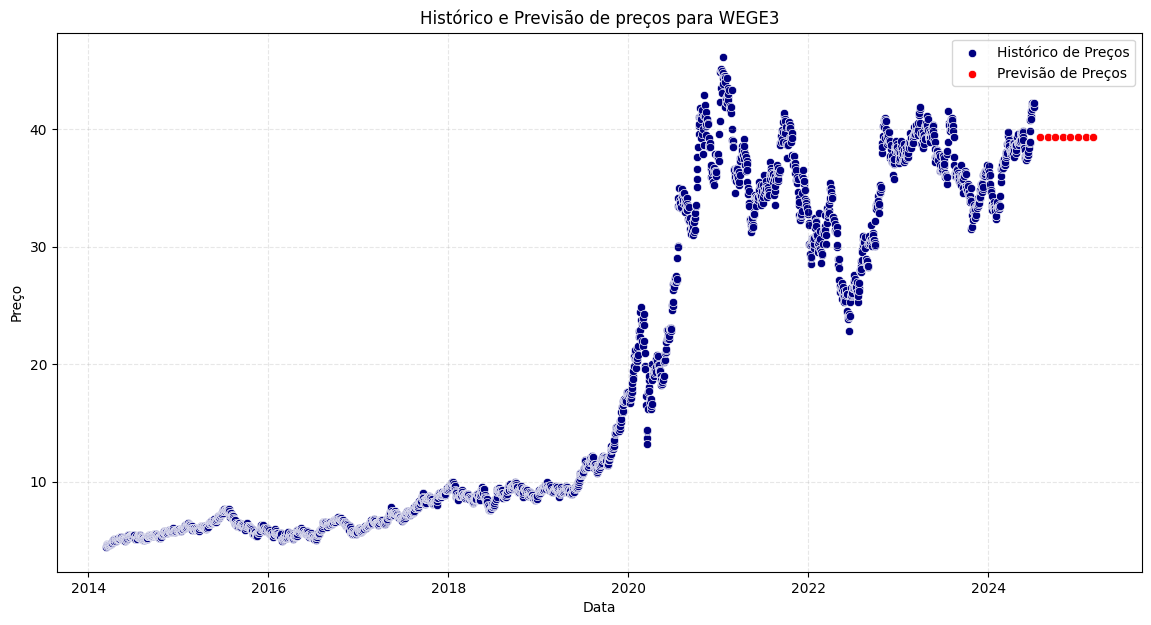

In [49]:
# Visualização dos resultados
plt.figure(figsize=(14, 7))

#vou plotar os dados os dados e a previsão
sns.scatterplot(x=df['Date'], y=df['WEGE3'], label='Histórico de Preços', color='navy')
sns.scatterplot(x=future_data['Date'], y=future_data['Predicted_WEGE3'], label='Previsão de Preços', color='red')

# Nomear os eixos do gráfico
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Histórico e Previsão de preços para WEGE3')
plt.legend()
plt.grid(True, alpha = 0.3, linestyle = '--')
plt.show()

In [50]:
print(future_data)

        Date   SMA_50  Volatility  Predicted_WEGE3
0 2024-07-31  39.4312    1.453246        39.309736
1 2024-08-31  39.4312    1.453246        39.309736
2 2024-09-30  39.4312    1.453246        39.309736
3 2024-10-31  39.4312    1.453246        39.309736
4 2024-11-30  39.4312    1.453246        39.309736
5 2024-12-31  39.4312    1.453246        39.309736
6 2025-01-31  39.4312    1.453246        39.309736
7 2025-02-28  39.4312    1.453246        39.309736




---



## Vou criar uma modelagem agora em que a volatilidade cai progressivamente ao longo do ano e as expectativas de média móvel de crescimento dos preços das ações serão as mesmas que dos últimos dois anos.

In [51]:
# Especificar as variáveis independentes e a dependente
X = df[['SMA_50', 'Volatility']]
y = df['WEGE3']

# Criar o modelo de regressão
model = LinearRegression()
model.fit(X, y)

# Gerar datas futuras até janeiro de 2025
dates_future = pd.date_range(start=df['Date'].max(), periods=8, freq='M')  # Gerando datas mensais até janeiro de 2025

# DataFrame para armazenar as datas futuras
future_data = pd.DataFrame({'Date': dates_future})

# Calcular SMA_50 e Volatility para datas futuras
# Média móvel baseada na média dos últimos dois anos
last_two_years = df[df['Date'] > df['Date'].max() - pd.DateOffset(years=2)]
average_growth_rate = last_two_years['WEGE3'].pct_change().mean()

# Calcular SMA_50 futura
last_sma_50 = df['SMA_50'].iloc[-1]
future_sma_50 = [last_sma_50 * (1 + average_growth_rate)**(i+1) for i in range(len(future_data))]

# Calcular Volatility futura conforme especificado
last_volatility = df['Volatility'].iloc[-1]
volatility_declines = [0.98, 0.97, 0.965, 0.95, 0.95, 0.95, 0.95, 0.93]
future_volatility = [last_volatility * decline for decline in volatility_declines]

# Adicionar SMA_50 e Volatility ao DataFrame de datas futuras
future_data['SMA_50'] = future_sma_50
future_data['Volatility'] = future_volatility

# Realizar as previsões para as datas futuras
X_future = future_data[['SMA_50', 'Volatility']]
predictions_future = model.predict(X_future)

# Adicionar as previsões ao DataFrame das datas futuras
future_data['Predicted_WEGE3'] = predictions_future

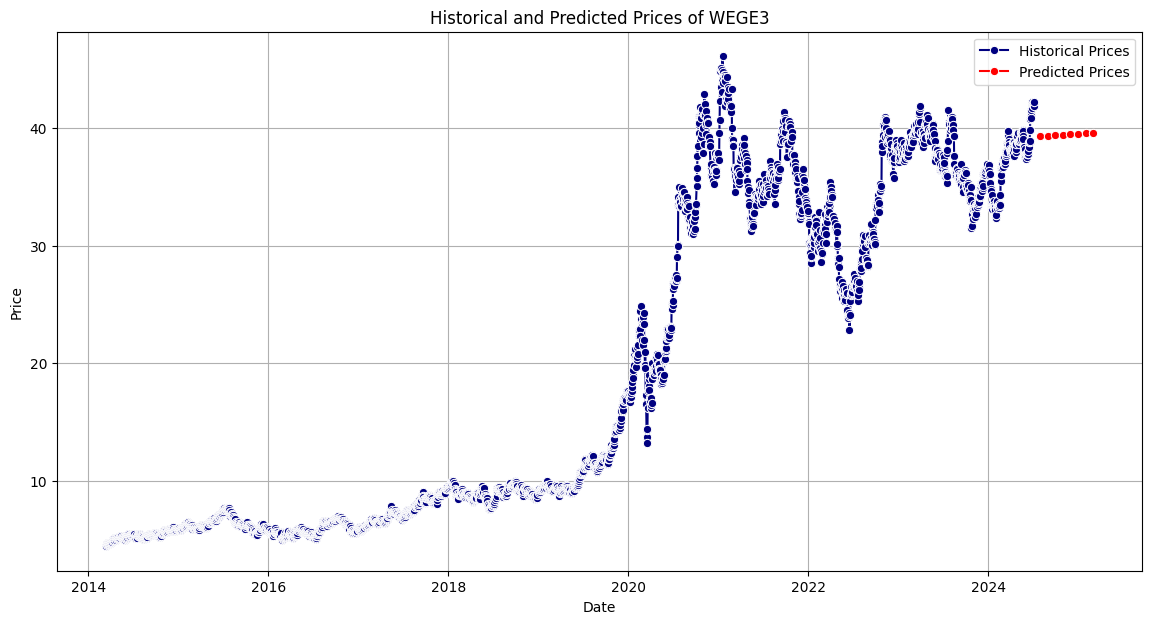

In [52]:
# Visualização dos resultados com Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='WEGE3', label='Historical Prices', marker='o', color='navy')
sns.lineplot(data=future_data, x='Date', y='Predicted_WEGE3', label='Predicted Prices', marker='o', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical and Predicted Prices of WEGE3')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
# Exibir as previsões para os meses futuros
print("Previsões de Preços Futuros da WEGE3:")
print(future_data[['Date', 'Predicted_WEGE3']])

Previsões de Preços Futuros da WEGE3:
        Date  Predicted_WEGE3
0 2024-07-31        39.329361
1 2024-08-31        39.358744
2 2024-09-30        39.393028
3 2024-10-31        39.417632
4 2024-11-30        39.456855
5 2024-12-31        39.496118
6 2025-01-31        39.535422
7 2025-02-28        39.555328


## Segundo a modelagem os preços das ações dessa empresa podem bem ser até que bem previstos por fatores como os crescimentos anteriores dos preços das ações e pelo grau de volatilidade desses preços. Do mesmo modo, porém, esse modelo demonstra que outros fatores influenciam na cotação de preços da empresa.

## Vou enumerar alguns fatores: além dos resultados dos medidores de desempenho da própria empresa, fatores macroeconômicos internos e externos e uma outra centena de variáveis também influenciam esses preços.

## Veja que isso não contradiz o resultado da regressão logística. A regressão naquele caso tentou mostrar a probabilidade de os preços caírem num futuro com base nos fatores colocados. No caso do modelo preditivo tentou-se modelar os preços da empresa dado a explicação deles por meio dos dois fatores considerados (média móvel e volatilidade) e comparar isso com os preços reais verificados no período 😉

#**END.!**